# Chapter 07. Visualization

## Scatter Plots and Line Graphs



Import packages

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Load a CSV file with Table.read_table()

In [ ]:
path_data = "https://raw.githubusercontent.com/mlee-pnu/IDS/main/FDS07/"
actors = pd.read_csv(path_data + 'actors.csv')
actors[:3]
# actors

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9


### Scatter Plots

#### Number of Movies vs. Total Gross

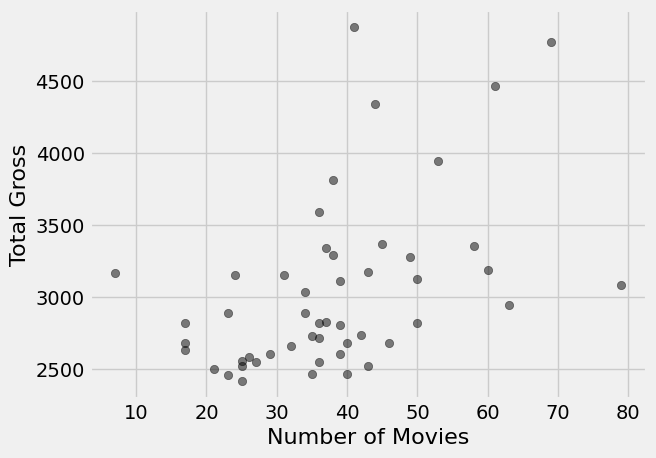

In [ ]:
x=actors['Number of Movies']
y=actors['Total Gross']
plt.scatter(x, y, color='black', alpha=0.5)
plt.xlabel('Number of Movies', fontsize=16)
plt.ylabel('Total Gross', fontsize=16)
plt.show()

Do you see any associations?

#### Number of Movies vs. Average per Movie

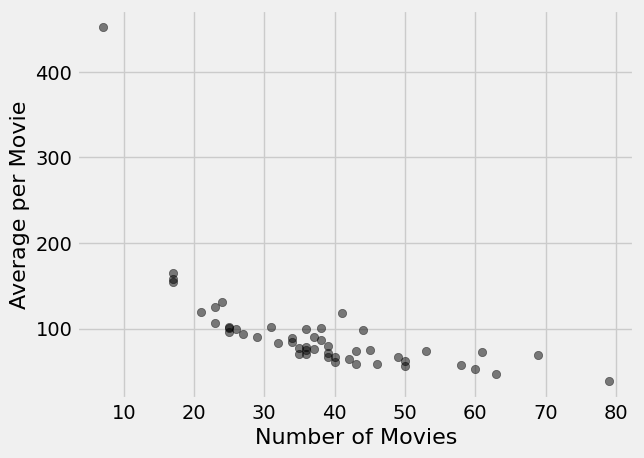

In [ ]:
x=actors['Number of Movies']
y=actors['Average per Movie']
plt.scatter(x, y, color='black', alpha=0.5)
plt.xlabel('Number of Movies', fontsize=16)
plt.ylabel('Average per Movie', fontsize=16)
plt.show()

Any associations?

Except for the very top point, it seems there is a negative association.

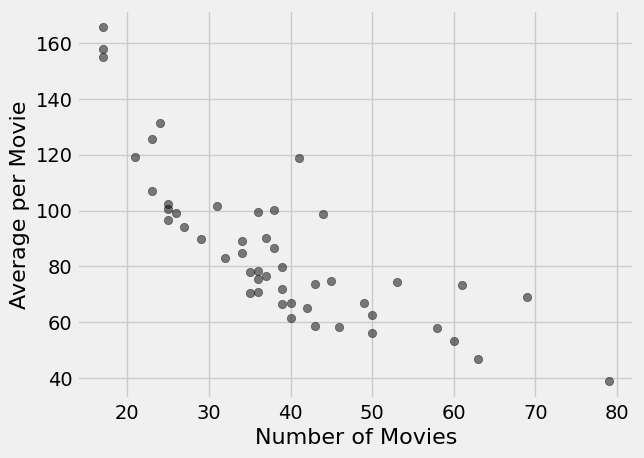

In [ ]:
# eliminate the outlier
no_outlier = actors[actors['Number of Movies']>10]

x=no_outlier['Number of Movies']
y=no_outlier['Average per Movie']
plt.scatter(x, y, color='black', alpha=0.5)
plt.xlabel('Number of Movies', fontsize=16)
plt.ylabel('Average per Movie', fontsize=16)
plt.show()

Who are those actors who appear in more than 60 movies?

In [ ]:
# Filter the actors who have been in more than 60 movies
actors[actors['Number of Movies']>60]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
21,Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


Who is the outlier?

In [ ]:
# Filter the actors who have been in less than 60 movies
actors[actors['Number of Movies']<10]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


In [ ]:
actors[(actors['Number of Movies']<10)|(actors['Number of Movies']>60)]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7
19,Robert DeNiro,3081.3,79,39.0,Meet the Fockers,279.3
21,Liam Neeson,2942.7,63,46.7,The Phantom Menace,474.5


### Line Plots

Read the movies_by_year data

In [ ]:
# Read csv movies_by_year
movies_by_year = pd.read_csv(path_data+'movies_by_year.csv')
movies_by_year[:3]

,Year,Total Gross,Number of Movies,#1 Movie
0,2015,11128.5,702,Star Wars: The Force Awakens
1,2014,10360.8,702,American Sniper
2,2013,10923.6,688,Catching Fire


Plot the number of movies by year

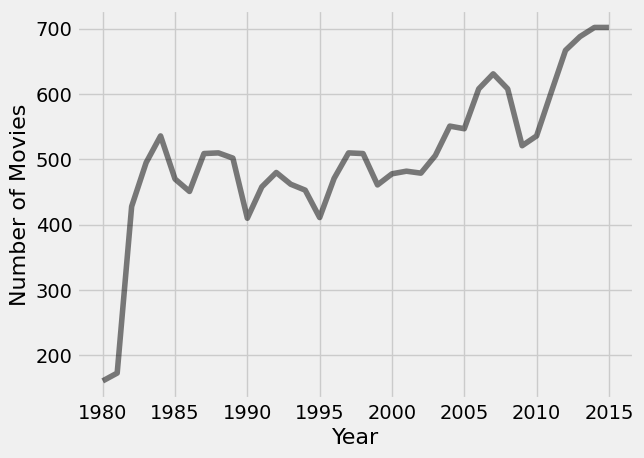

In [ ]:
x=movies_by_year['Year']
y=movies_by_year['Number of Movies']
plt.plot(x, y, color='black', alpha=0.5)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
plt.show()

What happened in the early 80s?

Let's focus on the 21st century.

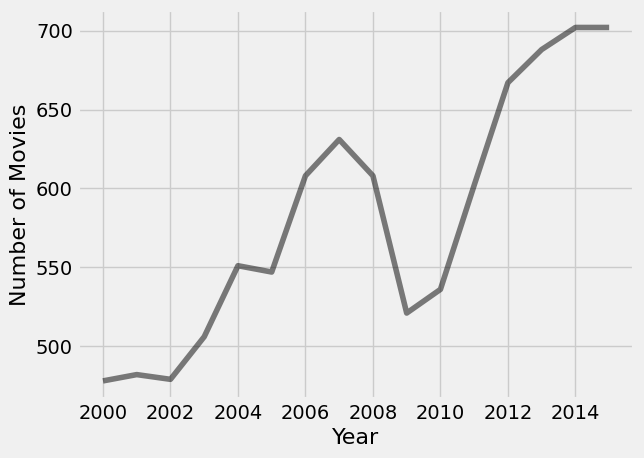

In [ ]:
century_21 = movies_by_year[movies_by_year.Year>1999]

x=century_21['Year']
y=century_21['Number of Movies']
plt.plot(x, y, color='black', alpha=0.5)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Movies', fontsize=16)
plt.show()

You can see how the global financial crisis affected the number of movies released. 

Was the total gross of the movie industry also affected?

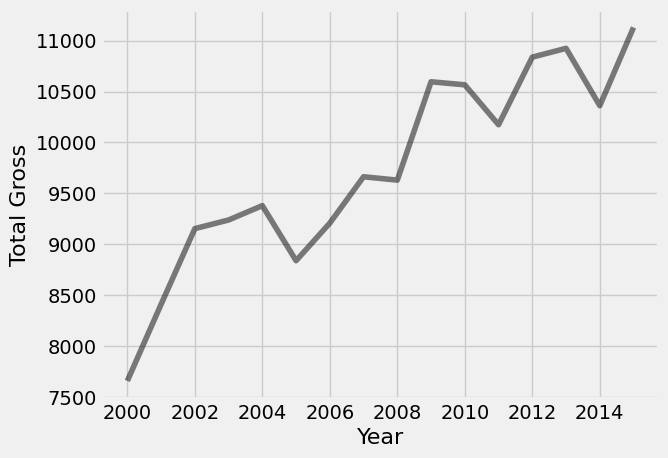

In [ ]:
x=century_21['Year']
y=century_21['Total Gross']
plt.plot(x, y, color='black', alpha=0.5)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Total Gross', fontsize=16)
plt.show()

Any unlikely patterns?

In [ ]:
# Filter year 2009
century_21[century_21.Year==2009]

,Year,Total Gross,Number of Movies,#1 Movie
6,2009,10595.5,521,Avatar


## 7.1 Visualizing Categorical Distributions

The table `icecream` contains data on 30 cartons of ice-cream. 

In [ ]:
# Make table named icecream
icecream = pd.DataFrame({
    'Flavor': np.array(['Chocolate', 'Strawberry', 'Vanilla']),
    'Number of Cartons': np.array([16, 5, 9])
})
icecream

,Flavor,Number of Cartons
0,Chocolate,16
1,Strawberry,5
2,Vanilla,9


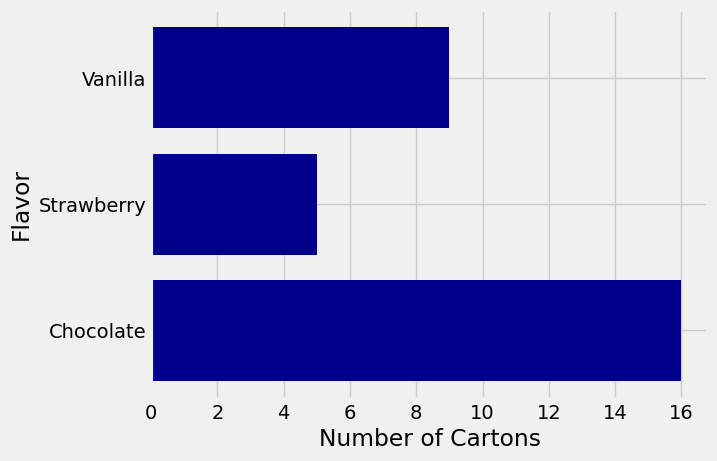

In [ ]:
x =icecream['Number of Cartons']
y =icecream['Flavor']

plt.barh(y,x, color='darkblue')
plt.xlabel('Number of Cartons')
plt.ylabel('Flavor')
plt.show()

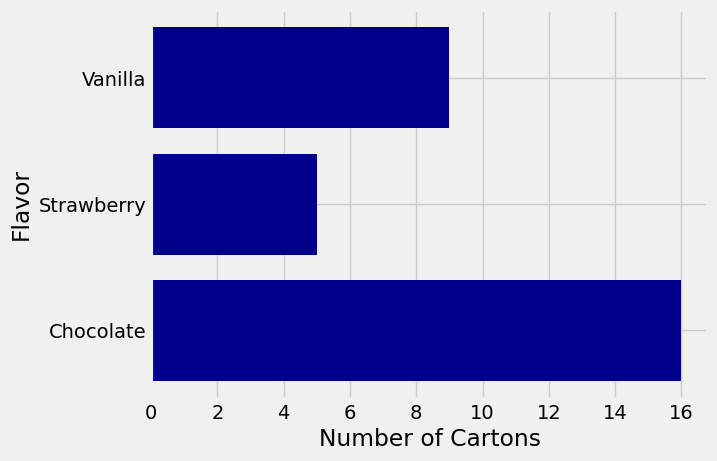

In [ ]:
x =icecream['Number of Cartons']
y =icecream['Flavor']

plt.barh(y,x, color='darkblue',tick_label=y)
plt.xlabel('Number of Cartons')
plt.ylabel('Flavor')
plt.show()

### 7.1.2. Design Aspects of Bar Charts

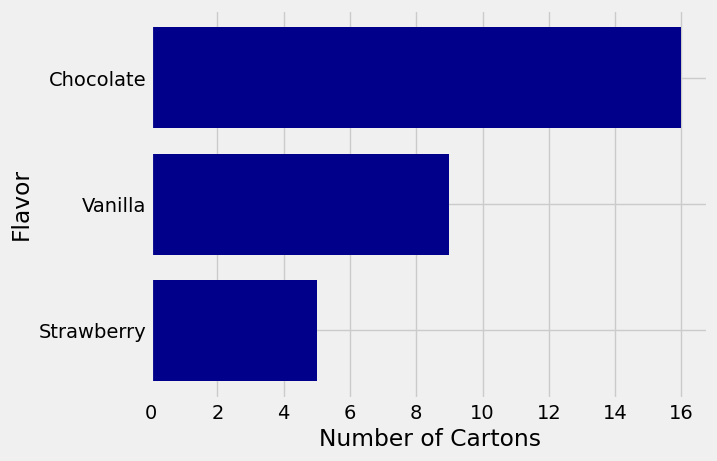

In [ ]:
icecream = icecream.sort_values(by=['Number of Cartons'])

x =icecream['Number of Cartons']
y =icecream['Flavor']

plt.barh(y,x, color='darkblue')
plt.xlabel('Number of Cartons')
plt.ylabel('Flavor')
plt.show()

### 7.1.3. Grouping Categorical Data

In [ ]:
# Read table
top = pd.read_csv(path_data+'top_movies_2017.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


Aggregate the number of movies released by each studio

In [ ]:
# Filter 'Title' and 'Studio'
movies_and_studios = top.loc[:, ['Title', 'Studio']]
studio_distribution=movies_and_studios.groupby('Studio').size().reset_index(name='count')
# Or
# movies_and_studios.groupby('Studio')['Studio'].count().reset_index(name='count')
studio_distribution

,Studio,count
0,AVCO,1
1,Buena Vista,35
2,Columbia,9
3,Disney,11
4,Dreamworks,3
5,Fox,24
6,IFC,1
7,Lionsgate,3
8,MGM,7
9,Metro,1


In [ ]:
sum(studio_distribution['count'])

200

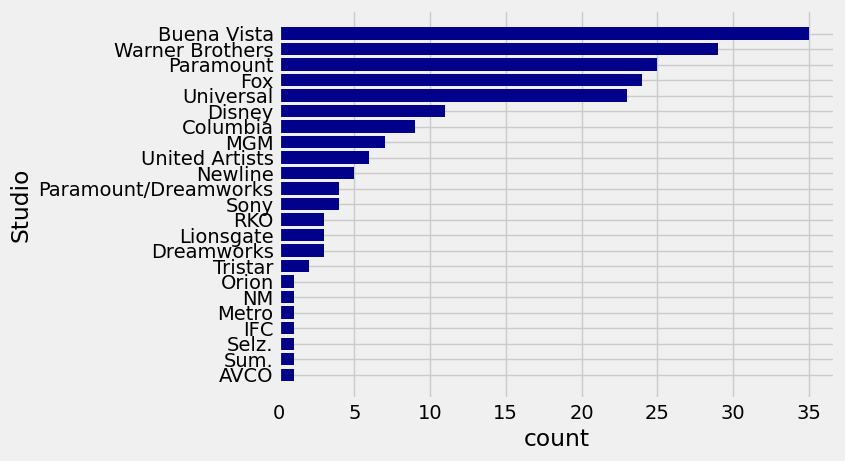

In [ ]:
# Distribution
studio_distribution = movies_and_studios.groupby('Studio')['Studio'].count().reset_index(name='count')

studio_distribution = studio_distribution.sort_values(by=['count'])

x =studio_distribution['count']
y =studio_distribution['Studio']

plt.barh(y,x, color='darkblue')
plt.xlabel('count')
plt.ylabel('Studio')
plt.show()

### 7.1.4. Towards Quantitative Variables

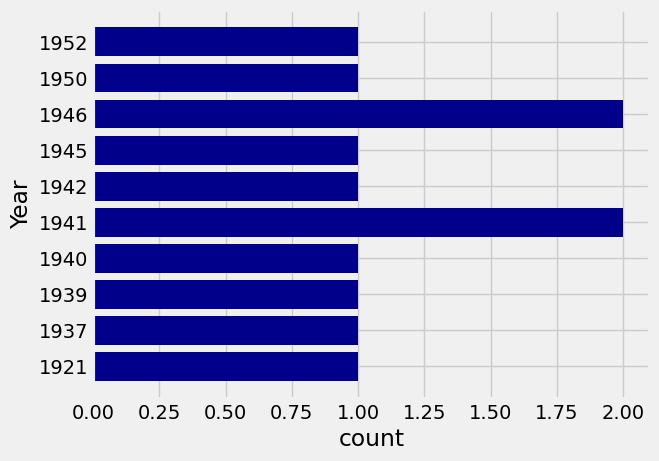

In [ ]:
# Distribution
movies_and_years = top.loc[:, ['Title', 'Year']]
movies_and_years = movies_and_years.groupby('Year')['Year'].count().reset_index(name='count')

x =movies_and_years['count'][:10]
y =movies_and_years['Year'].astype(str)[:10]

plt.barh(y,x, color='darkblue')
plt.xlabel('count')
plt.ylabel('Year')
plt.show()

In [ ]:
movies_and_years = top.loc[:, ['Title', 'Year']]
movies_and_years = movies_and_years.groupby('Year')['Year'].count().reset_index(name='count')
movies_and_years

,Year,count
0,1921,1
1,1937,1
2,1939,1
3,1940,1
4,1941,2
...,...,...
67,2013,4
68,2014,3
69,2015,6
70,2016,9


## 7.2. Visualizing Numerical Distributions

In [ ]:
# Read table
top = pd.read_csv(path_data+'top_movies_2017.csv')
top

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997
...,...,...,...,...,...
195,9 to 5,Fox,103290500,341357800,1980
196,Batman v Superman: Dawn of Justice,Warner Brothers,330360194,340137000,2016
197,The Firm,Paramount,158348367,340028200,1993
198,Suicide Squad,Warner Brothers,325100054,339411900,2016


In [ ]:
# Make a new table millions
millions = pd.DataFrame({'Title': top['Title'], 
                         'Adjusted Gross': np.round(top['Gross (Adjusted)']/1e6, 2)})
millions

,Title,Adjusted Gross
0,Gone with the Wind,1796.18
1,Star Wars,1583.48
2,The Sound of Music,1266.07
3,E.T.: The Extra-Terrestrial,1261.08
4,Titanic,1204.37
...,...,...
195,9 to 5,341.36
196,Batman v Superman: Dawn of Justice,340.14
197,The Firm,340.03
198,Suicide Squad,339.41


### 7.2.1. Binning the Data

In [ ]:
adj_gross = millions['Adjusted Gross']
min(adj_gross), max(adj_gross)

(338.41, 1796.18)

In [ ]:
# Calculate bins
# Define bins range
bins_range = np.arange(300, 2001, 100)

# Method1: Construct bins and Delay Count
bins = pd.cut(millions['Adjusted Gross'], bins_range, right=False).value_counts().reset_index(name='Adjusted Gross Count')
bins.rename(columns={'index': 'bins'}, inplace=True)

'''
# Method2: Construct bins and Delay Count
bins = millions.groupby(pd.cut(millions['Adjusted Gross'], bins_range, right=False))
bins = pd.DataFrame(bins['Adjusted Gross'].count().reset_index(name='Adjusted Gross Count'))
bins.rename(columns={'Adjusted Gross': 'bins'}, inplace=True)
bins
'''

bins

,bins,Adjusted Gross Count
0,"[300, 400)",68
1,"[400, 500)",60
2,"[500, 600)",32
3,"[600, 700)",15
4,"[700, 800)",7
5,"[800, 900)",7
6,"[1200, 1300)",3
7,"[1100, 1200)",3
8,"[900, 1000)",3
9,"[1500, 1600)",1


In [ ]:
bins = pd.cut(millions['Adjusted Gross'], 11).value_counts().reset_index(name='Adjusted Gross Count')
bins.rename(columns={'index': 'bins'}, inplace=True)
bins

,bins,Adjusted Gross Count
0,"(336.952, 470.935]",106
1,"(470.935, 603.459]",55
2,"(603.459, 735.984]",16
3,"(735.984, 868.508]",9
4,"(868.508, 1001.033]",6
5,"(1133.557, 1266.082]",5
6,"(1001.033, 1133.557]",1
7,"(1531.131, 1663.655]",1
8,"(1663.655, 1796.18]",1
9,"(1266.082, 1398.606]",0


In [ ]:
bins = pd.cut(millions['Adjusted Gross'], 5).value_counts().reset_index(name='Adjusted Gross Count')
bins.rename(columns={'index': 'bins'}, inplace=True)
bins

,bins,Adjusted Gross Count
0,"(336.952, 629.964]",165
1,"(629.964, 921.518]",24
2,"(921.518, 1213.072]",7
3,"(1213.072, 1504.626]",2
4,"(1504.626, 1796.18]",2


### 7.2.2. Histogram

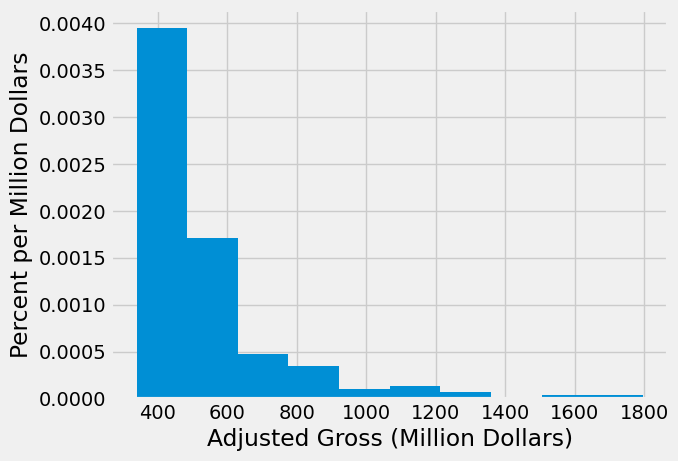

In [ ]:
x = millions['Adjusted Gross']
plt.hist(x, density =True)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

### 7.2.3. The Horizontal Axis

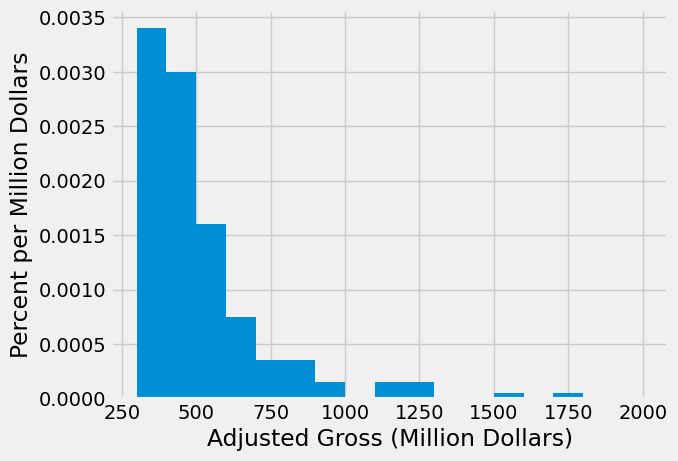

In [ ]:
x = millions['Adjusted Gross']
plt.hist(x ,bins=np.arange(300,2001,100),density =True)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

### 7.2.4. The Area Principle

### 7.2.5. The Histogram: General Principles and Calculation

### 7.2.6. The Vertical Axis: Density Scale

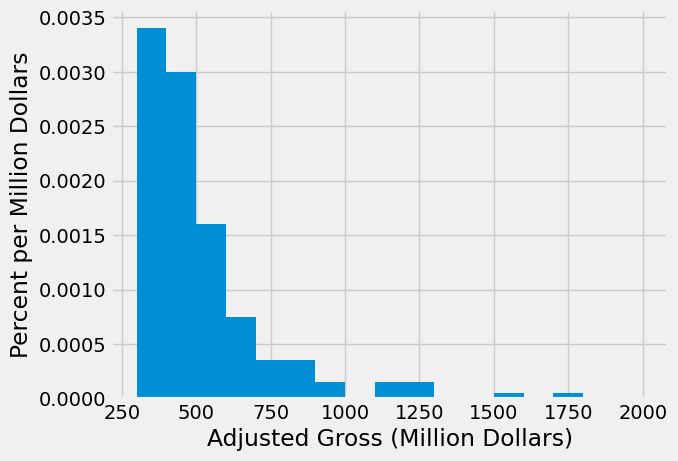

In [ ]:
x = millions['Adjusted Gross']
plt.hist(x ,bins=np.arange(300,2001,100), density =True)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

In [ ]:
# Calculate bins
# Define bins range
bins_range = np.arange(300, 2001, 100)

# Method1: Construct bins and Delay Count
bins = pd.cut(millions['Adjusted Gross'], bins_range, right=False).value_counts().reset_index(name='Adjusted Gross Count')
bins.rename(columns={'index': 'bins'}, inplace=True)

'''
# Method2: Construct bins and Delay Count
bins = millions.groupby(pd.cut(millions['Adjusted Gross'], bins_range, right=False))
bins = pd.DataFrame(bins['Adjusted Gross'].count().reset_index(name='Adjusted Gross Count'))
bins.rename(columns={'Adjusted Gross': 'bins'}, inplace=True)
bins
'''

bins[:3]

,bins,Adjusted Gross Count
0,"[300, 400)",68
1,"[400, 500)",60
2,"[500, 600)",32


### 7.2.7. WHy Not Simple Plot the Counts?

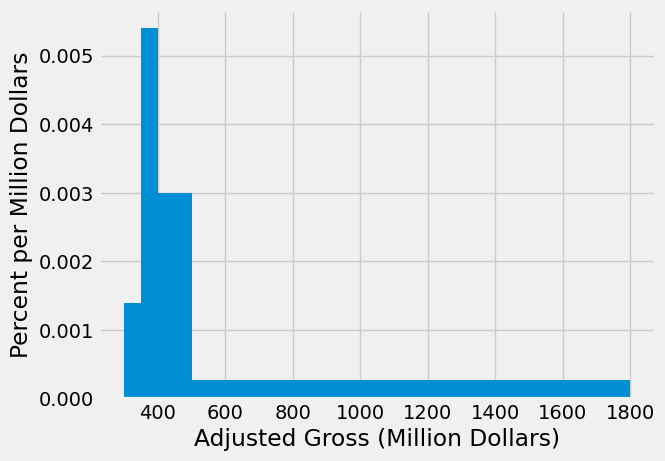

In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
x = millions['Adjusted Gross']
plt.hist(x,bins=uneven, density =True)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

In [ ]:
bins = pd.cut(millions['Adjusted Gross'], uneven).value_counts().reset_index(name='Adjusted Gross Count')
bins.rename(columns={'index': 'bins'}, inplace=True)
bins

,bins,Adjusted Gross Count
0,"(500, 1800]",72
1,"(400, 500]",60
2,"(350, 400]",54
3,"(300, 350]",14


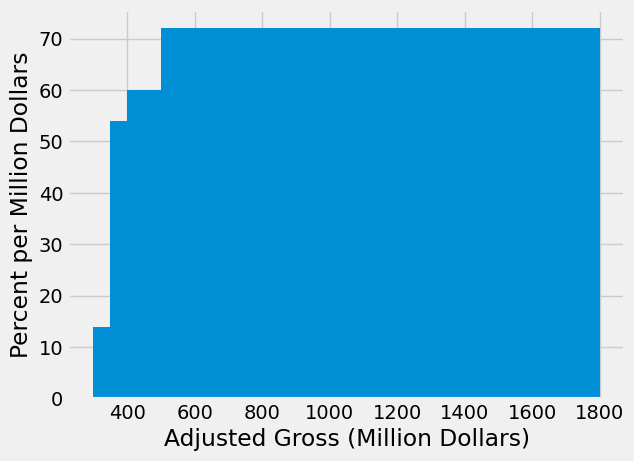

In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
x = millions['Adjusted Gross']
plt.hist(x ,bins=uneven)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

### 7.2.8. Flat Tops and the Level of Detail

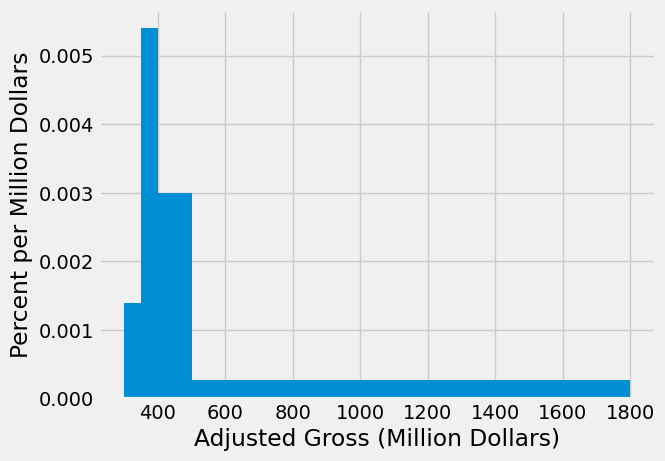

In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
x = millions['Adjusted Gross']
plt.hist(x,bins=uneven, density =True)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

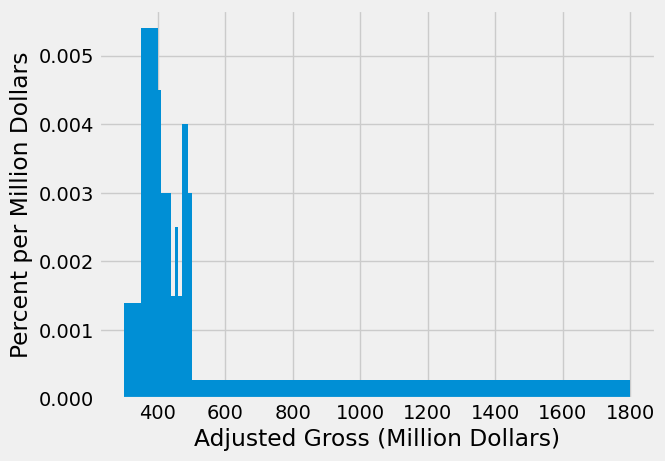

In [ ]:
uneven = np.array([300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800])
x = millions['Adjusted Gross']
plt.hist(x,bins=uneven, density =True)
plt.xlabel('Adjusted Gross (Million Dollars)')
plt.ylabel('Percent per Million Dollars')
plt.show()

### 7.2.9. Computing All Heights

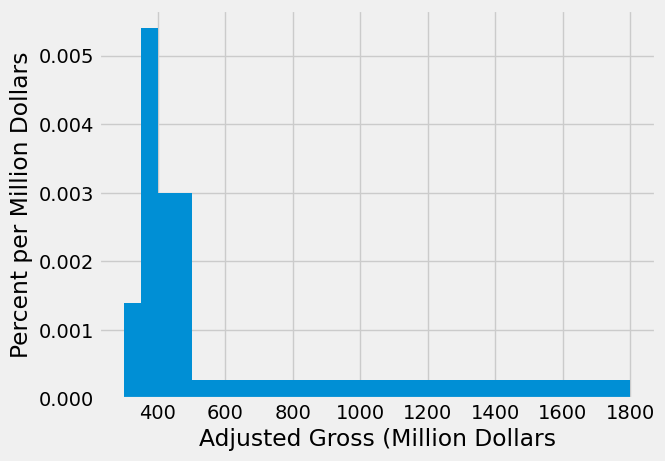

In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
x = millions['Adjusted Gross']
plt.hist(x,bins=uneven, density =True)
plt.xlabel('Adjusted Gross (Million Dollars')
plt.ylabel('Percent per Million Dollars')
plt.show()

In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
bins = pd.cut(millions['Adjusted Gross'], uneven, right=False).value_counts().reset_index(name='count')
bins.rename(columns={'index': 'bins'}, inplace=True)
bins

,bins,count
0,"[500, 1800)",72
1,"[400, 500)",60
2,"[350, 400)",54
3,"[300, 350)",14


In [ ]:
bins['percent'] = bins['count']/sum(bins['count'])*100
bins

,bins,count,percent
0,"[500, 1800)",72,36.0
1,"[400, 500)",60,30.0
2,"[350, 400)",54,27.0
3,"[300, 350)",14,7.0


In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
bins['width'] = [ uneven[i+1] - uneven[i] for i in range(len(uneven)-1)]
bins

,bins,count,percent,width
0,"[500, 1800)",72,36.0,50
1,"[400, 500)",60,30.0,50
2,"[350, 400)",54,27.0,100
3,"[300, 350)",14,7.0,1300


In [ ]:
bins['Height'] = bins.loc[:, 'count']/sum(bins.loc[:, 'count'])
bins

,bins,count,percent,width,Height
0,"[500, 1800)",72,36.0,50,0.36
1,"[400, 500)",60,30.0,50,0.30
2,"[350, 400)",54,27.0,100,0.27
3,"[300, 350)",14,7.0,1300,0.07


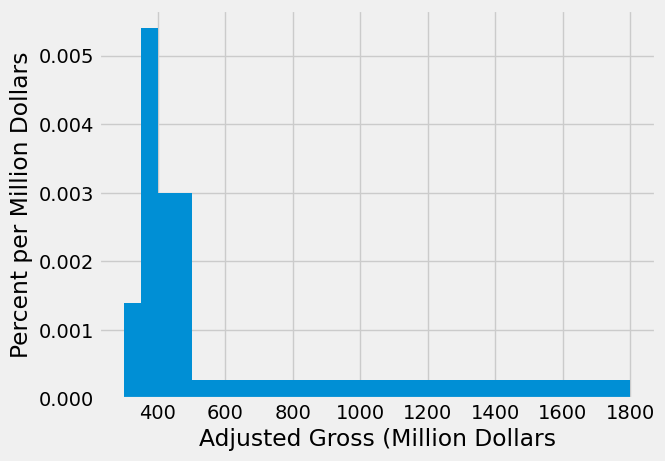

In [ ]:
uneven = np.array([300, 350, 400, 500, 1800])
x = millions['Adjusted Gross']
plt.hist(x,bins=uneven, density =True)
plt.xlabel('Adjusted Gross (Million Dollars')
plt.ylabel('Percent per Million Dollars')
plt.show()

### 7.2.10. Differences Between Bar Charts and Histogram

## 7.3. Overlaid Graphs

### 7.3.1. Overlaid Scatter Plots

In [ ]:
# Import dataset galton_subset.csv
heights = pd.read_csv(path_data+'sons_heights.csv')
heights

,father,mother,son
0,78.5,67.0,73.2
1,75.5,66.5,73.5
2,75.0,64.0,71.0
3,75.0,64.0,70.5
4,75.0,58.5,72.0
...,...,...,...
174,64.0,64.0,70.5
175,64.0,63.0,64.5
176,64.0,60.0,66.0
177,62.0,66.0,64.0


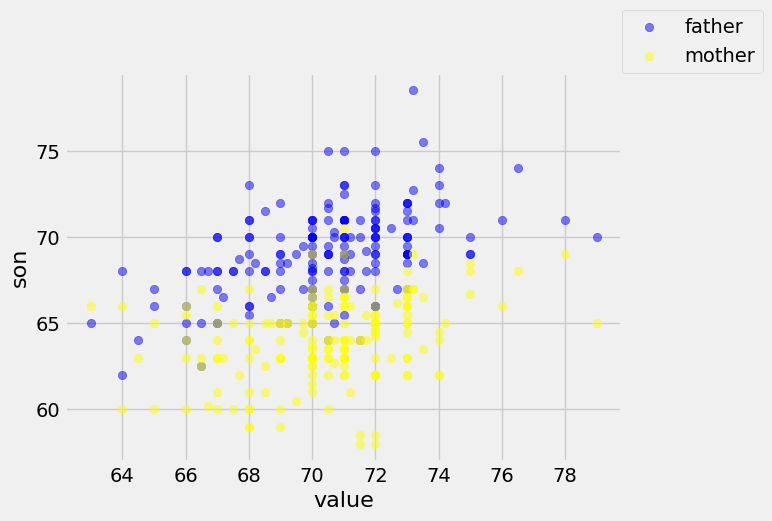

In [ ]:
x = heights['son']
y = heights['father']
z = heights['mother']
plt.scatter(x,y, color='blue', alpha=0.5, label='father')
plt.scatter(x,z, color='yellow', alpha=0.5, label='mother')
plt.xlabel('value', fontsize=16)
plt.ylabel('son', fontsize=16)
plt.legend(loc=(1.0, 1.0))
plt.show()

### 7.3.2. Overlaid Line Plots

In [ ]:
# Read the full Census table
data = 'http://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.csv'
full_census_table = pd.read_csv(data)

# Extract four columns from full_census_table.
partial_census_table = full_census_table[['SEX', 'AGE', 'POPESTIMATE2019', 'POPESTIMATE2014']]

# Rename two columns
us_pop = partial_census_table.rename(columns={'POPESTIMATE2019': '2019', 'POPESTIMATE2014': '2014'}, inplace=False)

# Access the rows corresponding to all children, ages 0-18, sex 0 (male & female)
filter1 = us_pop['AGE'] <= 18
filter2 = us_pop['SEX'] == 0
children = us_pop.loc[filter1 & filter2]

# Drop column 'SEX'
children.drop(columns=['SEX'], inplace=True)
children

<ipython-input-47-78cc78ed9275>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  children.drop(columns=['SEX'], inplace=True)


,AGE,2019,2014
0,0,3783052,3954787
1,1,3829599,3948891
2,2,3922044,3958711
3,3,3998665,4005928
4,4,4043323,4004032
5,5,4028281,4004576
6,6,4017227,4133372
7,7,4022319,4152666
8,8,4066194,4118349
9,9,4061874,4106068


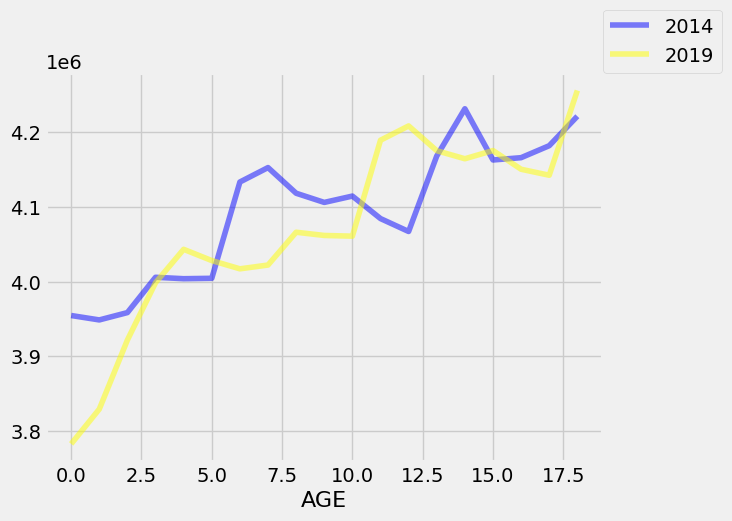

In [ ]:
x = children['AGE']
y = children['2014']
z = children['2019']
plt.plot(x,y, color='blue', alpha=0.5, label='2014')
plt.plot(x,z, color='yellow', alpha=0.5, label='2019')
plt.xlabel('AGE', fontsize=16)
plt.legend(loc=(1.0, 1.0))
plt.show()

### 7.3.3. Bar Charts

In [ ]:
# Read CSV use_ca
usa_ca = pd.read_csv(path_data+'usa_ca_2019.csv')
usa_ca

,Ethnicity/Race,USA All,CA All,USA Children,CA Children
0,API,5.8,15.1,4.9,11.5
1,Black,12.2,5.3,13.4,4.9
2,Hispanic,18.5,39.5,25.6,52.1
3,White,60.1,36.4,50.0,25.5
4,Other,3.4,3.7,6.1,6.0


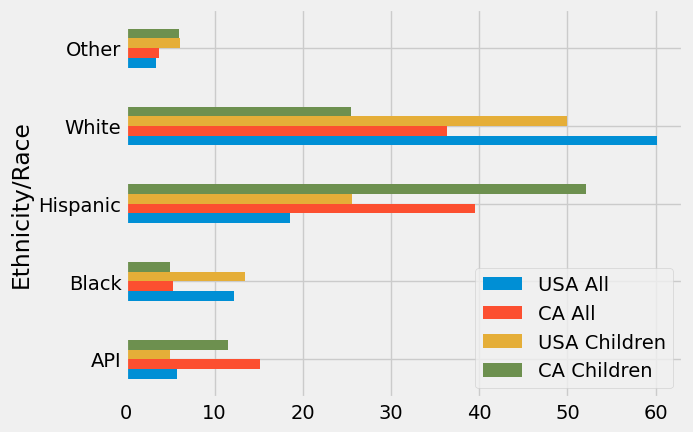

In [ ]:
new_usa_ca = usa_ca.set_index(keys=['Ethnicity/Race'], inplace=False)
ax = new_usa_ca.plot.barh()

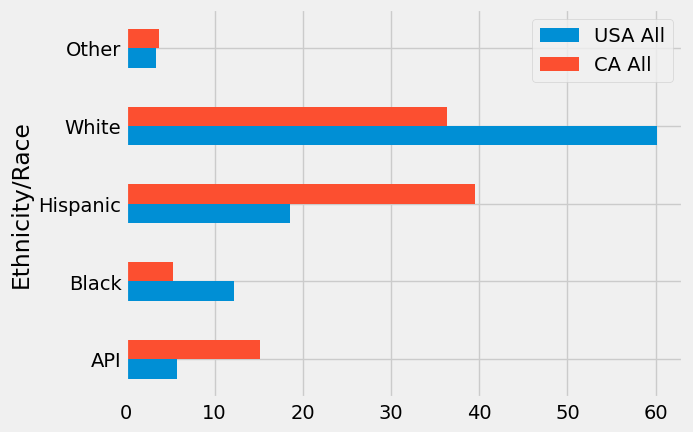

In [ ]:
new_usa_ca = usa_ca.set_index(keys=['Ethnicity/Race'], inplace=False)
new_usa_ca = new_usa_ca[['USA All','CA All']]
ax = new_usa_ca.plot.barh()

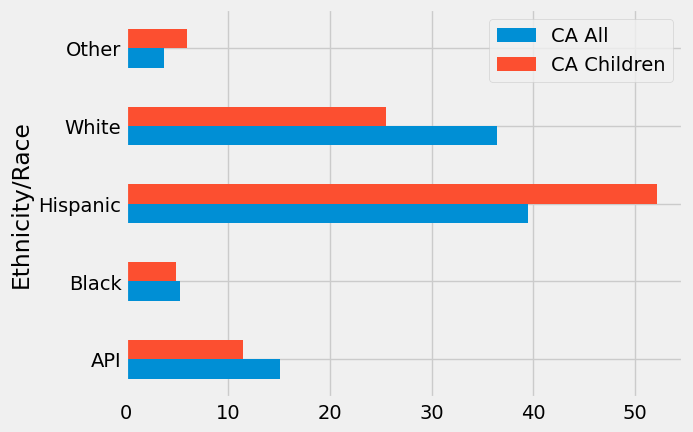

In [ ]:
new_usa_ca = usa_ca.set_index(keys=['Ethnicity/Race'], inplace=False)
new_usa_ca = new_usa_ca[['CA All','CA Children']]
ax = new_usa_ca.plot.barh()